In [2]:
import pandas as pd
from datetime import date
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

In [3]:
df = pd.read_csv('m-hsoldhst6312.txt', sep=' ')


In [4]:
df['Date'] = df['year'].astype(str)+' /'+df['mon'].astype(str)

In [13]:
df_new = df[['Date', 'hstart']]
df_new

,Date,hstart
0,1963 /1,79.0
1,1963 /2,89.6
2,1963 /3,124.8
3,1963 /4,164.2
4,1963 /5,172.7
...,...,...
590,2012 /3,58.0
591,2012 /4,66.8
592,2012 /5,67.8
593,2012 /6,74.7


In [6]:
train_values = df_new.hstart.values.reshape(-1,1)
train_values

array([[ 79. ],
       [ 89.6],
       [124.8],
       [164.2],
       [172.7],
       [154.2],
       [151.3],
       [144. ],
       [143.7],
       [165.3],
       [119.3],
       [ 95. ],
       [ 97.9],
       [101.3],
       [129.1],
       [147.1],
       [152.8],
       [157.2],
       [140.6],
       [138.3],
       [119.8],
       [141.2],
       [110.6],
       [ 93. ],
       [ 81.7],
       [ 80.9],
       [119.9],
       [148.6],
       [153.3],
       [151.8],
       [139.1],
       [128.3],
       [124.6],
       [133.1],
       [110.5],
       [101.1],
       [ 79.4],
       [ 76.2],
       [118.1],
       [140.9],
       [130. ],
       [120.6],
       [ 99.2],
       [101.8],
       [ 89.1],
       [ 76.6],
       [ 72.8],
       [ 60.2],
       [ 59.1],
       [ 61.4],
       [ 91.5],
       [113.7],
       [132. ],
       [125.4],
       [125.3],
       [127.4],
       [121.9],
       [135.4],
       [118.4],
       [ 80.1],
       [ 80.5],
       [ 84.6],
       [

In [7]:
#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(train_values)

In [8]:
def create_dataset(scaled_data):
    window_size = 60
    x_set =[]
    y_set =[]
    
    for i in range(window_size,len(scaled_data)):
        x_set.append(scaled_data[i-window_size:i,:])
        y_set.append(scaled_data[i,0:1])
        
    return x_set, y_set

In [9]:
x_set, y_set = create_dataset(scaled_dataset)
x_data = np.array(x_set)
y_data = np.array(y_set)
print(x_data.shape)
print(y_data.shape)

(535, 60, 1)
(535, 1)


In [10]:
#Split data
#x_data
train_size = int(len(x_data)*0.8)
test_size_x = len(x_data) - train_size
train_data_x = x_data[:train_size]
test_data_x =  x_data[train_size:]

print(train_data_x.shape[2])

#y_data
train_size = int(len(y_data)*0.8)
test_size_y = len(y_data) - train_size
train_data_y = y_data[:train_size]
test_data_y =  y_data[train_size:]
print(train_data_y.shape)

1
(428, 1)


In [12]:
train_data_x

array([[[0.23305294],
        [0.28550223],
        [0.45967343],
        ...,
        [0.51212271],
        [0.42800594],
        [0.23849579]],

       [[0.28550223],
        [0.45967343],
        [0.65462642],
        ...,
        [0.42800594],
        [0.23849579],
        [0.24047501]],

       [[0.45967343],
        [0.65462642],
        [0.69668481],
        ...,
        [0.23849579],
        [0.24047501],
        [0.260762  ]],

       ...,

       [[0.63186541],
        [0.61405245],
        [0.57199406],
        ...,
        [0.57050965],
        [0.59030183],
        [0.65858486]],

       [[0.61405245],
        [0.57199406],
        [0.54230579],
        ...,
        [0.59030183],
        [0.65858486],
        [0.70559129]],

       [[0.57199406],
        [0.54230579],
        [0.61157843],
        ...,
        [0.65858486],
        [0.70559129],
        [0.71202375]]])

In [26]:
model = Sequential()
model.add(LSTM(units = 256, return_sequences = True, input_shape=(train_data_x.shape[1], train_data_x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 256))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')   

In [28]:
model.fit(train_data_x, train_data_y, epochs = 200, batch_size=70)

Epoch 1/200
7/7 [==============================] - 4s 575ms/step - loss: 0.0221
Epoch 2/200
7/7 [==============================] - 5s 657ms/step - loss: 0.0255
Epoch 3/200
7/7 [==============================] - 6s 773ms/step - loss: 0.0257
Epoch 4/200
7/7 [==============================] - 5s 745ms/step - loss: 0.0234
Epoch 5/200
7/7 [==============================] - 5s 757ms/step - loss: 0.0203
Epoch 6/200
7/7 [==============================] - 5s 759ms/step - loss: 0.0203
Epoch 7/200
7/7 [==============================] - 5s 767ms/step - loss: 0.0203
Epoch 8/200
7/7 [==============================] - 6s 783ms/step - loss: 0.0207
Epoch 9/200
7/7 [==============================] - 6s 768ms/step - loss: 0.0190
Epoch 10/200
7/7 [==============================] - 5s 770ms/step - loss: 0.0183
Epoch 11/200
7/7 [==============================] - 5s 768ms/step - loss: 0.0165
Epoch 12/200
7/7 [==============================] - 5s 757ms/step - loss: 0.0165
Epoch 13/200
7/7 [===================

KeyboardInterrupt: 

In [21]:
y_predicted = model.predict(test_data_x)
y_predicted.shape

4/4 [==============================] - 1s 49ms/step


(115, 1)

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(scaler.inverse_transform(test_data_y), scaler.inverse_transform(y_predicted))

rmse = np.sqrt(mse)
rmse

12.18731009358579

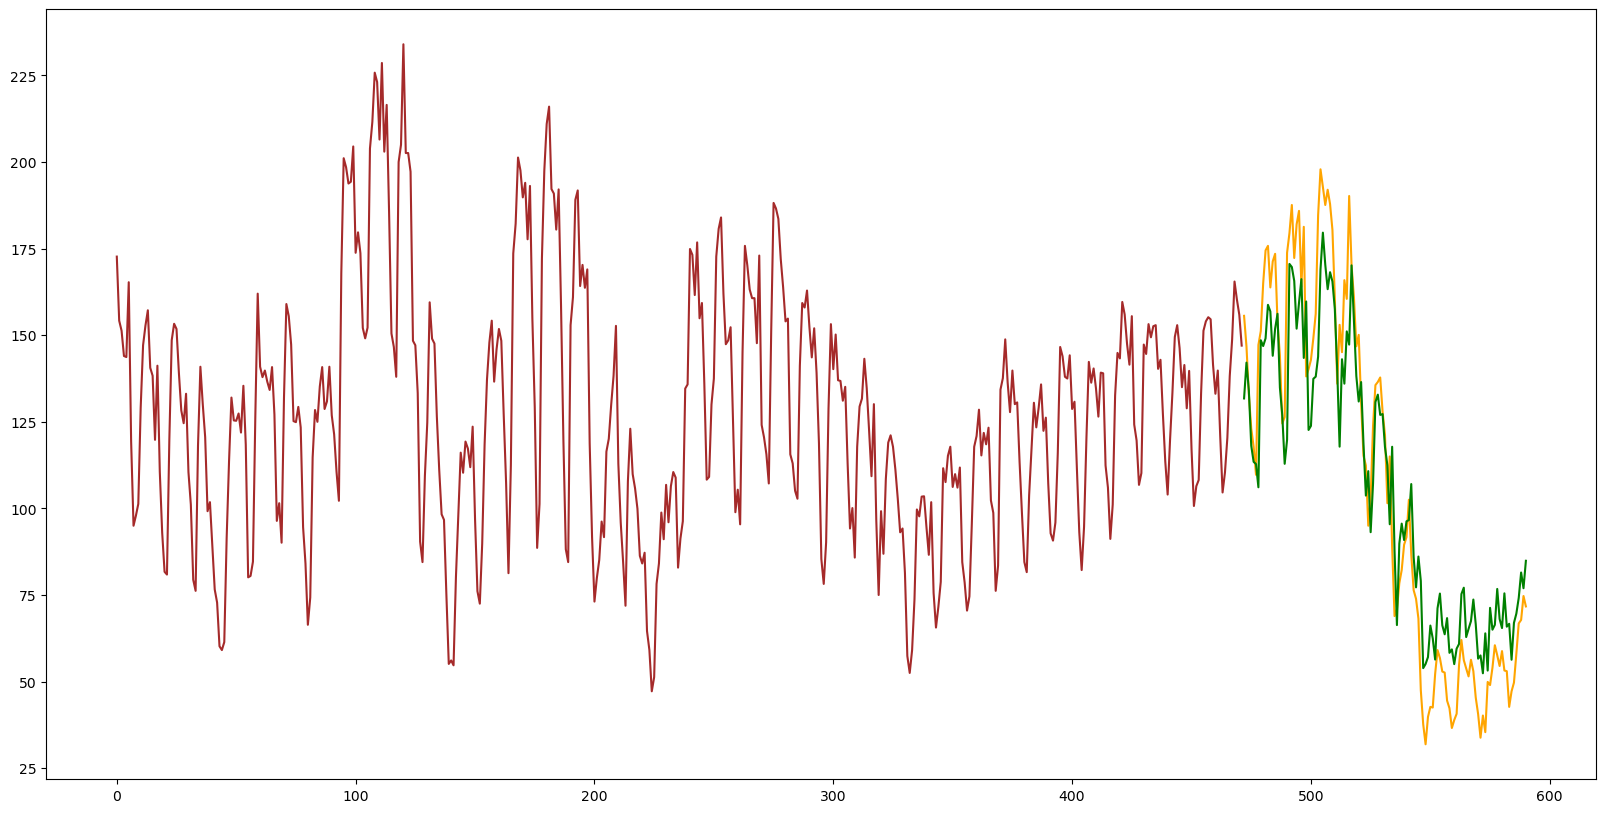

In [37]:
y_test_original = scaler.inverse_transform(test_data_y)
y_pred_original = scaler.inverse_transform(y_predicted)
ig = plt.subplots(figsize=(20, 10))
plt.plot(np.arange(0, len(train_data_y)), scaler.inverse_transform(train_data_y), color='brown', label='Historical Price')
plt.plot(np.arange(len(train_data_y), len(train_data_y) + len(y_test_original)), y_test_original, color='orange', label='Actual Price')
plt.plot(np.arange(len(train_data_y), len(train_data_y) + len(y_pred_original)), y_pred_original, color='green', label='Predicted Price')
